In [40]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%config InlineBackend.figure_formats = ['svg']

In [41]:
DATASET_PATH = "../data/extract/ugr16-small.csv"
data_df = pd.read_csv(DATASET_PATH, index_col=0)
data_df.head()

,datetime_end,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding,type,packet,byte,label
0,2016-08-07 21:08:25,0.484,253.139.127.229,42.219.156.215,25,48324,TCP,.AP.SF,0,0,5,564,anomaly-spam
1,2016-08-08 14:10:17,0.468,253.139.127.230,42.219.156.213,25,51871,TCP,.AP.SF,0,0,5,564,anomaly-spam
2,2016-03-24 11:35:33,0.296,42.219.156.223,108.66.255.194,40484,25,TCP,.A.RS.,0,0,4,216,anomaly-spam
3,2016-08-07 00:10:32,2.616,42.219.156.214,194.192.119.38,44877,25,TCP,.APRS.,0,0,21,7486,anomaly-spam
4,2016-08-06 22:40:05,0.364,194.192.119.34,42.219.156.215,25,35728,TCP,.AP.SF,0,0,5,564,anomaly-spam


## Convertir les colonnes dans les bons types

In [42]:
data_df.dtypes

datetime_end         object
duration            float64
source_ip            object
destination_ip       object
source_port           int64
destination_port      int64
protocol             object
flag                 object
forwarding            int64
type                  int64
packet                int64
byte                  int64
label                object
dtype: object

In [43]:
# Convert all object to string if it is possible
data_df = data_df.convert_dtypes()

In [44]:
data_df.datetime_end = pd.to_datetime(data_df.datetime_end)

In [45]:
data_df.dtypes

datetime_end        datetime64[ns]
duration                   Float64
source_ip                   string
destination_ip              string
source_port                  Int64
destination_port             Int64
protocol                    string
flag                        string
forwarding                   Int64
type                         Int64
packet                       Int64
byte                         Int64
label                       string
dtype: object

## Statistique

In [46]:
data_df.describe()

,duration,source_port,destination_port,forwarding,type,packet,byte
count,144000.000000,144000.000000,144000.000000,144000.0,144000.000000,144000.000000,1.440000e+05
mean,3.448271,22821.530799,18248.463188,0.0,9.795743,13.349451,7.310470e+03
std,28.182113,23701.165404,22826.470416,0.0,21.374257,633.989822,4.231828e+05
min,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2.800000e+01
25%,0.000000,80.000000,80.000000,0.0,0.000000,1.000000,6.900000e+01
50%,0.000000,8395.500000,5014.000000,0.0,0.000000,2.000000,1.970000e+02
75%,1.044000,47044.000000,41711.250000,0.0,0.000000,6.000000,6.850000e+02
max,2691.891000,65535.000000,65535.000000,0.0,224.000000,178011.000000,8.562566e+07


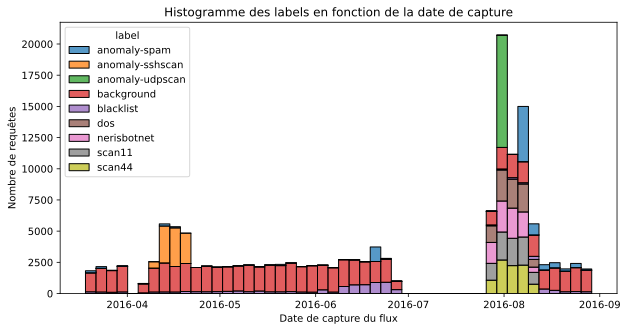

In [47]:
plt.figure(figsize=(10,5))
g = sns.histplot(data=data_df,
             x="datetime_end",
             hue="label",
             multiple="stack",
             )
g.set_xlabel("Date de capture du flux")
g.set_ylabel("Nombre de requêtes")
g.set_title("Histogramme des labels en fonction de la date de capture")
plt.savefig("count-extract-ugr16.svg")

## Preprocess variables qualitatives

In [48]:
data_df.protocol.value_counts()

TCP     100971
UDP      42085
ICMP       857
GRE         47
ESP         33
IPIP         5
IPv6         2
Name: protocol, dtype: Int64

* Port range par définition : [0, 65 535]
* Forwarding : 0
* Normaliser(Standardiser) duration/type/packet/byte
* datetime_end => récupérer l'heure, minutes, seconde . to second depuis le debut de journée => /24 * 60 * 60
* source_ip et destination_ip => split(".") / 255
* protocol / flag / label => get_dummies

* forwarding ???

* datetime_end : jour / seconde
* source_ip : split / 255
* destination_ip : split / 255
* source_port : /65535
* destination_port : /65535
* flag : split (0 ou 1)


* protocol : OHE
* label : OHE

* duration : Normaliser
* type : Normaliser
* packet : Normaliser
* byte : Normaliser

## Train/Test

## Preprocess variables quantitatives